In [1]:
#dT2020raw.SUBZONE_N.unique()

In [2]:
#dT20192011 = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)')

In [3]:
#dT20192011

In [4]:
#pd.DataFrame(dT20192011.Subzone.unique()) - pd.DataFrame(dT2020raw.SUBZONE_N.unique())

# Obtaining BusStop and MRTStop information
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Using Geopandas to Import BusStops

In [15]:
import geopandas as gpd
import pandas as pd

ModuleNotFoundError: No module named 'geopandas'

In [6]:
#Load into GeoDataFrame
gdf_BusStop = gpd.read_file('BusStop.shp')

In [7]:
gdf_BusStop.head()

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156)
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458)
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741)
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180)
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514)


<AxesSubplot:>

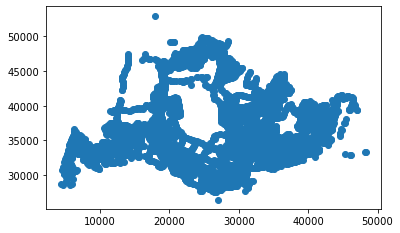

In [8]:
gdf_BusStop.plot()

### Using Geopandas to Import Subzone

In [9]:
#Load into GeoDataFrame
gdf_Subzone = gpd.read_file('MP14_SUBZONE_WEB_PL.shp')

In [10]:
gdf_Subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


### Left join BusStops with Subzone

In [11]:
from geopandas.tools import sjoin
join_left_df_BusStop = sjoin(gdf_BusStop, gdf_Subzone, how="left")
join_left_df_BusStop

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry,index_right,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156),245.0,246.0,5.0,PASIR RIS DRIVE,PRSZ05,N,PASIR RIS,PR,EAST REGION,ER,2B73597AF3F174F3,2014-12-05,42032.4580,38988.2187,5311.060366,1.639669e+06
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458),207.0,208.0,4.0,HOUGANG WEST,HGSZ04,N,HOUGANG,HG,NORTH-EAST REGION,NER,27B0E0BDE3579753,2014-12-05,33849.2205,39506.8724,6424.482139,1.328876e+06
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741),208.0,209.0,3.0,PAYA LEBAR WEST,PLSZ03,N,PAYA LEBAR,PL,EAST REGION,ER,4BADA58E2612A6E2,2014-12-05,36649.3106,39403.4873,5898.475695,6.098947e+05
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180),166.0,167.0,5.0,FRANKEL,BDSZ05,N,BEDOK,BD,EAST REGION,ER,B34F041CC4B050EC,2014-12-05,37694.5519,33007.2679,8750.386291,4.297141e+06
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514),227.0,228.0,10.0,YIO CHU KANG,AMSZ10,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,5E2B16BB381BAEA4,2014-12-05,29443.7447,40836.0207,4533.218364,9.094186e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,24539,B03,DUNDEE MARINE,POINT (8211.954 31924.108),78.0,79.0,5.0,PIONEER SECTOR,PNSZ05,N,PIONEER,PN,WEST REGION,WR,F3241D6C0FEF13ED,2014-12-05,8872.7501,31423.4434,8489.982578,2.796007e+06
5133,46441,B02,BLK 816,POINT (23143.267 47097.652),305.0,306.0,2.0,MIDVIEW,WDSZ02,N,WOODLANDS,WD,NORTH REGION,NR,42D5F52D334C615F,2014-12-05,23349.7600,46841.1143,4159.201440,9.364155e+05
5134,64391,B04,BLK 831,POINT (34273.668 39267.502),242.0,243.0,1.0,HOUGANG CENTRAL,HGSZ01,N,HOUGANG,HG,NORTH-EAST REGION,NER,C4419A9A8D05E0DF,2014-12-05,34470.7005,39076.5963,2759.815466,4.417334e+05
5135,10389,B01,BLK 48,POINT (27156.674 30126.309),6.0,7.0,9.0,BUKIT HO SWEE,BMSZ09,N,BUKIT MERAH,BM,CENTRAL REGION,CR,7839A8577144EFE2,2014-12-05,27680.0627,30230.8610,3275.312488,5.517320e+05


### Filter out relevant rows for BusStop_Subzone

In [12]:
BusStop_Subzone = join_left_df_BusStop.filter(['BUS_STOP_N','SUBZONE_N','PLN_AREA_N', 'REGION_N'], axis=1)
BusStop_Subzone

,BUS_STOP_N,SUBZONE_N,PLN_AREA_N,REGION_N
0,78221,PASIR RIS DRIVE,PASIR RIS,EAST REGION
1,63359,HOUGANG WEST,HOUGANG,NORTH-EAST REGION
2,64141,PAYA LEBAR WEST,PAYA LEBAR,EAST REGION
3,83139,FRANKEL,BEDOK,EAST REGION
4,55231,YIO CHU KANG,ANG MO KIO,NORTH-EAST REGION
...,...,...,...,...
5132,24539,PIONEER SECTOR,PIONEER,WEST REGION
5133,46441,MIDVIEW,WOODLANDS,NORTH REGION
5134,64391,HOUGANG CENTRAL,HOUGANG,NORTH-EAST REGION
5135,10389,BUKIT HO SWEE,BUKIT MERAH,CENTRAL REGION


In [13]:
#BusStop_Subzone_count = BusStop_Subzone.groupby('SUBZONE_N').count()
#BusStop_Subzone_count = BusStop_Subzone_count.filter(['SUBZONE_N', 'BUS_STOP_N'], axis=1)
#BusStop_Subzone_count

### Using Geopandas to Import MRT Stops

In [14]:
#Load into GeoDataFrame
gdf_MRTStop = gpd.read_file('MRTLRTStnPtt.shp')

In [15]:
gdf_MRTStop.head()

,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


<AxesSubplot:>

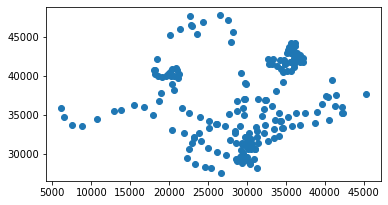

In [16]:
gdf_MRTStop.plot()

### Left join MRTStops with Subzone

In [17]:
from geopandas.tools import sjoin
join_left_df_MRTStop = sjoin(gdf_MRTStop, gdf_Subzone, how="left")
join_left_df_MRTStop
# Note the NaNs where the point did not intersect a boro

,OBJECTID_left,STN_NAME,STN_NO,geometry,index_right,OBJECTID_right,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078),169,170,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,58687154BD252A0A,2014-12-05,35237.1681,33246.0587,7028.340071,2.579087e+06
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302),146,147,4,LAKESIDE,JESZ04,N,JURONG EAST,JE,WEST REGION,WR,3BBFD45071B70ECF,2014-12-05,16697.0118,35114.9062,8828.633830,3.108023e+06
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568),316,317,8,KHATIB,YSSZ08,N,YISHUN,YS,NORTH REGION,NR,DC75517DA31123DB,2014-12-05,27480.6357,44420.6884,4956.145735,1.432913e+06
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548),280,281,2,TURF CLUB,SKSZ02,N,SUNGEI KADUT,SK,NORTH REGION,NR,17459E60C3EEAF30,2014-12-05,20234.6006,44507.1901,7665.676019,3.291406e+06
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820),4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,189,TELOK BLANGAH MRT STATION,CC28,POINT (25376.847 28138.967),23,24,1,MARITIME SQUARE,BMSZ01,N,BUKIT MERAH,BM,CENTRAL REGION,CR,C1AC31ABF9978DDB,2014-12-05,25805.7867,27911.4193,13737.116181,2.701634e+06
181,190,TELOK AYER MRT STATION,DT18,POINT (29667.622 29414.587),35,36,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2014-12-05,29153.9676,29158.0443,4297.599910,5.872227e+05
182,191,NEWTON MRT STATION,NS21,POINT (28519.362 32735.207),120,121,3,NEWTON CIRCUS,NTSZ03,Y,NEWTON,NT,CENTRAL REGION,CR,8B2F19EEE51EDA60,2014-12-05,28587.1626,32653.9428,2399.407300,2.135816e+05
183,0,CANBERRA MRT STATION,NS12,POINT (27598.622 47200.242),307,308,2,SEMBAWANG SPRINGS,SBSZ02,N,SEMBAWANG,SB,NORTH REGION,NR,C739B507A1ACBDB3,2014-12-05,27076.8118,46959.0886,4212.042247,1.099395e+06


### Filter out relevant rows for MRTStop_Subzone

In [18]:
MRTStop_Subzone = join_left_df_MRTStop.filter(['STN_NAME', 'STN_NO', 'SUBZONE_N', 'PLN_AREA_N', 'REGION_N'], axis=1)
MRTStop_Subzone

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION
1,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,JURONG EAST,WEST REGION
2,KHATIB MRT STATION,NS14,KHATIB,YISHUN,NORTH REGION
3,KRANJI MRT STATION,NS7,TURF CLUB,SUNGEI KADUT,NORTH REGION
4,REDHILL MRT STATION,EW18,REDHILL,BUKIT MERAH,CENTRAL REGION
...,...,...,...,...,...
180,TELOK BLANGAH MRT STATION,CC28,MARITIME SQUARE,BUKIT MERAH,CENTRAL REGION
181,TELOK AYER MRT STATION,DT18,CHINATOWN,OUTRAM,CENTRAL REGION
182,NEWTON MRT STATION,NS21,NEWTON CIRCUS,NEWTON,CENTRAL REGION
183,CANBERRA MRT STATION,NS12,SEMBAWANG SPRINGS,SEMBAWANG,NORTH REGION


### EXAMPLE: MRT Stops by tap-in tap-out volume

In [19]:
MRTStop_TITO = pd.read_csv('2.8_transport_node_train_202101.csv')    
sum_column = MRTStop_TITO["TOTAL_TAP_IN_VOLUME"] + MRTStop_TITO["TOTAL_TAP_OUT_VOLUME"]
MRTStop_TITO["TOTAL_TAP_VOLUME"] = sum_column
MRTStop_TITO = MRTStop_TITO.filter(['PT_CODE', 'TOTAL_TAP_VOLUME'], axis=1)
MRTStop_TITO = MRTStop_TITO.groupby('PT_CODE')['TOTAL_TAP_VOLUME'].sum()
MRTStop_TITO

PT_CODE
BP10    183991
BP11    165351
BP12    126103
BP13     65108
BP2     151841
         ...  
SW6     171376
SW7     127504
SW8     101888
TE1      98724
TE3     141889
Name: TOTAL_TAP_VOLUME, Length: 159, dtype: int64

### EXAMPLE: Merge MRT Stops by tap-in tap-out volume with MRTStop_Subzone

In [20]:
testing = pd.merge(MRTStop_Subzone, MRTStop_TITO, how='inner', left_on = 'STN_NO', right_on = 'PT_CODE', validate='many_to_many')
testing.head(10)

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N,TOTAL_TAP_VOLUME
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,642053
1,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,JURONG EAST,WEST REGION,406676
2,KHATIB MRT STATION,NS14,KHATIB,YISHUN,NORTH REGION,1448844
3,KRANJI MRT STATION,NS7,TURF CLUB,SUNGEI KADUT,NORTH REGION,262221
4,REDHILL MRT STATION,EW18,REDHILL,BUKIT MERAH,CENTRAL REGION,766934
5,YEW TEE MRT STATION,NS5,YEW TEE,CHOA CHU KANG,WEST REGION,1410006
6,PIONEER MRT STATION,EW28,JURONG WEST CENTRAL,JURONG WEST,WEST REGION,1190585
7,COMMONWEALTH MRT STATION,EW20,COMMONWEALTH,QUEENSTOWN,CENTRAL REGION,640451
8,SIMEI MRT STATION,EW3,SIMEI,TAMPINES,EAST REGION,769284
9,ADMIRALTY MRT STATION,NS10,WOODLANDS EAST,WOODLANDS,NORTH REGION,2150081


### EXAMPLE: Number of MRT Stops by Subzone

In [21]:
MRTStop_Subzone_count = testing.groupby('SUBZONE_N').count()
MRTStop_Subzone_count = MRTStop_Subzone_count.rename(columns={'STN_NAME': 'STN_NUM'})
MRTStop_Subzone_count = MRTStop_Subzone_count.filter(['SUBZONE_N', 'STN_NUM'], axis=1)
MRTStop_Subzone_count

,STN_NUM
SUBZONE_N,
ALJUNIED,3
ANAK BUKIT,1
ANCHORVALE,3
BANGKIT,2
BEDOK NORTH,1
...,...
WOODLANDS SOUTH,1
WOODLANDS WEST,1
YEW TEE,1


### EXAMPLE: Filter 'testing' and groupby SUBZONE

In [22]:
MRTStop_testing = testing.filter(['SUBZONE_N', 'TOTAL_TAP_VOLUME', 'STN_NUM'], axis=1)
MRTStop_testing = MRTStop_testing.groupby('SUBZONE_N')['TOTAL_TAP_VOLUME'].sum()
MRTStop_testing

SUBZONE_N
ALJUNIED           1489384
ANAK BUKIT          538115
ANCHORVALE          364099
BANGKIT             232430
BEDOK NORTH        1460136
                    ...   
WOODLANDS SOUTH     141889
WOODLANDS WEST     1005198
YEW TEE            1410006
YIO CHU KANG       1043477
YISHUN WEST        2484007
Name: TOTAL_TAP_VOLUME, Length: 102, dtype: int64

### EXAMPLE: Merge MRTStop_testing and MRTStop_Subzone_count datasets

In [23]:
MRTStop_testing = pd.merge(MRTStop_testing, MRTStop_Subzone_count, how='inner', on = 'SUBZONE_N', validate='many_to_many')
MRTStop_testing

,TOTAL_TAP_VOLUME,STN_NUM
SUBZONE_N,,
ALJUNIED,1489384,3
ANAK BUKIT,538115,1
ANCHORVALE,364099,3
BANGKIT,232430,2
BEDOK NORTH,1460136,1
...,...,...
WOODLANDS SOUTH,141889,1
WOODLANDS WEST,1005198,1
YEW TEE,1410006,1


# Subzone Demographics Data (Shihan)
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

#### 2020

In [24]:
dT2020raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Total)'); x = 69840
dT2020raw = dT2020raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw['SUBZONE_N'] = dT2020raw['SUBZONE_N'].str.upper()
dT2020raw = dT2020raw[:x]
dT2020raw = dT2020raw[dT2020raw['SUBZONE_N'] != 'TOTAL']
dT2020raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2020'], axis=1)
dT2020raw

,Planning Area,SUBZONE_N,Age Group,Type of Dwelling,2020
360,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Total,4810
361,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Total HDB^,2830
362,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,1- and 2-Room Flats*,-
363,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,3-Room Flats,400
364,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,4-Room Flats,630
...,...,...,...,...,...
69835,Yishun,YISHUN WEST,90 & Over,4-Room Flats,90
69836,Yishun,YISHUN WEST,90 & Over,5-Room and Executive Flats,20
69837,Yishun,YISHUN WEST,90 & Over,Condominiums and Other Apartments,10
69838,Yishun,YISHUN WEST,90 & Over,Landed Properties,-


In [25]:
listOfSubzones = dT2020raw.SUBZONE_N.unique()
listOfSubzones

array(['ANG MO KIO TOWN CENTRE', 'CHENG SAN', 'CHONG BOON', 'KEBUN BAHRU',
       'SEMBAWANG HILLS', 'SHANGRI-LA', 'TAGORE', 'TOWNSVILLE',
       'YIO CHU KANG', 'YIO CHU KANG EAST', 'YIO CHU KANG NORTH',
       'YIO CHU KANG WEST', 'BAYSHORE', 'BEDOK NORTH', 'BEDOK RESERVOIR',
       'BEDOK SOUTH', 'FRANKEL', 'KAKI BUKIT', 'KEMBANGAN', 'SIGLAP',
       'BISHAN EAST', 'MARYMOUNT', 'UPPER THOMSON', 'LIU FANG', 'SAMULUN',
       'SHIPYARD', 'TUKANG', 'BRICKWORKS', 'BUKIT BATOK CENTRAL',
       'BUKIT BATOK EAST', 'BUKIT BATOK SOUTH', 'BUKIT BATOK WEST',
       'GOMBAK', 'GUILIN', 'HILLVIEW', 'HONG KAH NORTH', 'ALEXANDRA HILL',
       'ALEXANDRA NORTH', 'BUKIT HO SWEE', 'BUKIT MERAH',
       'CITY TERMINALS', 'DEPOT ROAD', 'EVERTON PARK', 'HENDERSON HILL',
       'KAMPONG TIONG BAHRU', 'MARITIME SQUARE', 'REDHILL',
       'SINGAPORE GENERAL HOSPITAL', 'TELOK BLANGAH DRIVE',
       'TELOK BLANGAH RISE', 'TELOK BLANGAH WAY', 'TIONG BAHRU',
       'TIONG BAHRU STATION', 'BANGKIT', 'DAIRY FAR

#### 2011-2019

In [26]:
dT201119raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)'); y = 68219
dT201119raw = dT201119raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw['SUBZONE_N'] = dT201119raw['SUBZONE_N'].str.upper()
dT201119raw = dT201119raw[:y]
dT201119raw = dT201119raw[dT201119raw['SUBZONE_N'] != 'TOTAL']
dT201119raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw

,Planning Area,SUBZONE_N,Age Group,Type of Dwelling,2011,2012,2013,2014,2015,2016,2017,2018,2019
360,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Total,4960,4850,4880,4970,5020,4980,4940,4820,4820
361,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Total HDB^,3400,3350,3330,3280,3250,3150,3090,2950,2880
362,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,1- and 2-Room Flats*,-,-,-,-,-,-,-,-,-
363,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,3-Room Flats,510,490,470,460,460,450,440,430,420
364,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,4-Room Flats,770,780,770,760,730,700,690,650,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,Yishun,YISHUN WEST,90 & Over,3-Room Flats,30,40,50,40,50,50,60,60,60
68215,Yishun,YISHUN WEST,90 & Over,4-Room Flats,40,50,50,50,60,70,70,70,80
68216,Yishun,YISHUN WEST,90 & Over,5-Room and Executive Flats,20,20,20,20,20,20,20,20,20
68217,Yishun,YISHUN WEST,90 & Over,Condominiums and Other Apartments,-,-,-,-,-,10,10,10,10


In [27]:
listOfSubzones1119 = dT201119raw.SUBZONE_N.unique()
listOfSubzones1119

array(['ANG MO KIO TOWN CENTRE', 'CHENG SAN', 'CHONG BOON', 'KEBUN BAHRU',
       'SEMBAWANG HILLS', 'SHANGRI-LA', 'TAGORE', 'TOWNSVILLE',
       'YIO CHU KANG', 'YIO CHU KANG EAST', 'YIO CHU KANG NORTH',
       'YIO CHU KANG WEST', 'BAYSHORE', 'BEDOK NORTH', 'BEDOK RESERVOIR',
       'BEDOK SOUTH', 'FRANKEL', 'KAKI BUKIT', 'KEMBANGAN', 'SIGLAP',
       'BISHAN EAST', 'MARYMOUNT', 'UPPER THOMSON', 'LIU FANG', 'SAMULUN',
       'SHIPYARD', 'TUKANG', 'BRICKWORKS', 'BUKIT BATOK CENTRAL',
       'BUKIT BATOK EAST', 'BUKIT BATOK SOUTH', 'BUKIT BATOK WEST',
       'GOMBAK', 'GUILIN', 'HILLVIEW', 'HONG KAH NORTH', 'ALEXANDRA HILL',
       'ALEXANDRA NORTH', 'BUKIT HO SWEE', 'BUKIT MERAH',
       'CITY TERMINALS', 'DEPOT ROAD', 'EVERTON PARK', 'HENDERSON HILL',
       'KAMPONG TIONG BAHRU', 'MARITIME SQUARE', 'REDHILL',
       'SINGAPORE GENERAL HOSPITAL', 'TELOK BLANGAH DRIVE',
       'TELOK BLANGAH RISE', 'TELOK BLANGAH WAY', 'TIONG BAHRU',
       'TIONG BAHRU STATION', 'BANGKIT', 'DAIRY FAR

### Extracting Gender

#### 2020

In [28]:
dT2020raw_male = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Male)'); x = 69840
dT2020raw_male = dT2020raw_male.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw_male['SUBZONE_N'] = dT2020raw_male['SUBZONE_N'].str.upper()
dT2020raw_male = dT2020raw_male[:x]
dT2020raw_male = dT2020raw_male[dT2020raw_male['SUBZONE_N'] != 'TOTAL']
dT2020raw_male = dT2020raw_male[dT2020raw_male['Age Group'] == 'Total']
dT2020raw_male = dT2020raw_male[dT2020raw_male['Type of Dwelling'] == 'Total']
dT2020raw_male = dT2020raw_male.filter(['SUBZONE_N', '2020'], axis=1)
dT2020raw_male['2020'] = dT2020raw_male['2020'].replace({'-': 0}).astype(int) #Replace '-' with '0'
dT2020raw_male

,SUBZONE_N,2020
360,ANG MO KIO TOWN CENTRE,2260
540,CHENG SAN,13480
720,CHONG BOON,12860
900,KEBUN BAHRU,10660
1080,SEMBAWANG HILLS,3210
...,...,...
68940,SPRINGLEAF,2180
69120,YISHUN CENTRAL,1290
69300,YISHUN EAST,30030
69480,YISHUN SOUTH,20670


In [29]:
dT2020raw_female = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Female)'); x = 69840
dT2020raw_female = dT2020raw_female.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw_female['SUBZONE_N'] = dT2020raw_female['SUBZONE_N'].str.upper()
dT2020raw_female = dT2020raw_female[:x]
dT2020raw_female = dT2020raw_female[dT2020raw_female['SUBZONE_N'] != 'TOTAL']
dT2020raw_female = dT2020raw_female[dT2020raw_female['Age Group'] == 'Total']
dT2020raw_female = dT2020raw_female[dT2020raw_female['Type of Dwelling'] == 'Total']
dT2020raw_female = dT2020raw_female.filter(['SUBZONE_N', '2020'], axis=1)
dT2020raw_female['2020'] = dT2020raw_female['2020'].replace({'-': 0}).astype(int) #Replace '-' with '0'
dT2020raw_female

,SUBZONE_N,2020
360,ANG MO KIO TOWN CENTRE,2550
540,CHENG SAN,14600
720,CHONG BOON,13640
900,KEBUN BAHRU,11970
1080,SEMBAWANG HILLS,3650
...,...,...
68940,SPRINGLEAF,2190
69120,YISHUN CENTRAL,1340
69300,YISHUN EAST,30640
69480,YISHUN SOUTH,21580


In [68]:
#Male percentage (2020)
dT2020_male_perc = pd.DataFrame(dT2020raw_male['2020'] + dT2020raw_female['2020'])
dT2020_male_perc = pd.DataFrame(dT2020raw_male['2020']/dT2020_male_perc['2020'])
dT2020_male_perc.rename(columns={'2020': 'Male Percentage'}, inplace=True)
dT2020_male_perc.columns = pd.MultiIndex.from_tuples(
        zip(['2020'], 
            dT2020_male_perc.columns))
dT2020_male_perc.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020_male_perc

,SUBZONE_N,2020
,,Male Percentage
360,ANG MO KIO TOWN CENTRE,0.469854
540,CHENG SAN,0.480057
720,CHONG BOON,0.485283
900,KEBUN BAHRU,0.471056
1080,SEMBAWANG HILLS,0.467930
...,...,...
68940,SPRINGLEAF,0.498856
69120,YISHUN CENTRAL,0.490494
69300,YISHUN EAST,0.494973


#### 2011-2019

In [55]:
dT201119raw_male = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Male)'); y = 68219
dT201119raw_male = dT201119raw_male.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw_male['SUBZONE_N'] = dT201119raw_male['SUBZONE_N'].str.upper()
dT201119raw_male = dT201119raw_male[:y]
dT201119raw_male = dT201119raw_male[dT201119raw_male['SUBZONE_N'] != 'TOTAL']
dT201119raw_male = dT201119raw_male[dT201119raw_male['Age Group'] == 'Total']
dT201119raw_male = dT201119raw_male[dT201119raw_male['Type of Dwelling'] == 'Total']
dT201119raw_male = dT201119raw_male.filter(['SUBZONE_N', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
for i in range(9):
    dT201119raw_male[str(2011+i)] = dT201119raw_male[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_male

,SUBZONE_N,2011,2012,2013,2014,2015,2016,2017,2018,2019
360,ANG MO KIO TOWN CENTRE,2400,2340,2330,2370,2370,2350,2330,2260,2250
540,CHENG SAN,14690,15060,14990,14770,14400,14030,13670,13550,13520
720,CHONG BOON,14620,14420,14250,13980,13590,13180,12970,13190,13050
900,KEBUN BAHRU,12450,12250,12130,11830,11450,11130,10810,10870,10820
1080,SEMBAWANG HILLS,3260,3250,3270,3230,3240,3240,3190,3140,3190
...,...,...,...,...,...,...,...,...,...,...
67320,SPRINGLEAF,1910,1930,1940,1950,1930,1990,2010,2110,2180
67500,YISHUN CENTRAL,790,770,780,780,740,730,710,680,1010
67680,YISHUN EAST,16970,18240,19080,22030,27190,28120,28530,28210,29510
67860,YISHUN SOUTH,19820,19660,19570,19680,19050,18720,18720,19990,20570


In [56]:
dT201119raw_female = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Female)'); y = 68219
dT201119raw_female = dT201119raw_female.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw_female['SUBZONE_N'] = dT201119raw_female['SUBZONE_N'].str.upper()
dT201119raw_female = dT201119raw_female[:y]
dT201119raw_female = dT201119raw_female[dT201119raw_female['SUBZONE_N'] != 'TOTAL']
dT201119raw_female = dT201119raw_female[dT201119raw_female['Age Group'] == 'Total']
dT201119raw_female = dT201119raw_female[dT201119raw_female['Type of Dwelling'] == 'Total']
dT201119raw_female = dT201119raw_female.filter(['SUBZONE_N', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
for i in range(9):
    dT201119raw_female[str(2011+i)] = dT201119raw_female[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_female

,SUBZONE_N,2011,2012,2013,2014,2015,2016,2017,2018,2019
360,ANG MO KIO TOWN CENTRE,2570,2520,2560,2600,2640,2630,2610,2560,2570
540,CHENG SAN,15450,15960,15920,15630,15370,15030,14690,14760,14660
720,CHONG BOON,15240,15040,14760,14680,14310,13940,13760,13890,13770
900,KEBUN BAHRU,13250,13050,12890,12710,12460,12180,11800,12100,12150
1080,SEMBAWANG HILLS,3630,3660,3640,3640,3650,3670,3610,3620,3640
...,...,...,...,...,...,...,...,...,...,...
67320,SPRINGLEAF,1910,1960,1960,1960,1940,2020,2060,2120,2170
67500,YISHUN CENTRAL,800,800,790,770,750,730,710,680,1010
67680,YISHUN EAST,17010,18300,19280,22360,27690,28630,29010,28730,30100
67860,YISHUN SOUTH,20220,20060,20000,20260,19790,19460,19530,20880,21490


In [72]:
#Male percentage (2011-2019)
dT201119_male_perc = pd.DataFrame(listOfSubzones1119, columns = ['SUBZONE_N'])
for i in range(9):
    totalMF = pd.DataFrame(dT201119raw_male[str(2011+i)] + dT201119raw_female[str(2011+i)])
    percMF = list(dT201119raw_male[str(2011+i)]/totalMF[str(2011+i)])
    dT201119_male_perc.insert(1, str(2011+i), percMF, True)
dT201119_male_perc = dT201119_male_perc.filter(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'])
dT201119_male_perc = dT201119_male_perc.rename(columns={'2019': 'Male Percentage', '2018': 'Male Percentage', '2017': 'Male Percentage', '2016': 'Male Percentage', '2015': 'Male Percentage', '2014': 'Male Percentage', '2013': 'Male Percentage', '2012': 'Male Percentage', '2011': 'Male Percentage'})
dT201119_male_perc.columns = pd.MultiIndex.from_tuples(
        zip(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'], 
            dT201119_male_perc.columns))
dT201119_male_perc.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119_male_perc

,SUBZONE_N,2019,2018,2017,2016,2015,2014,2013,2012,2011
,,Male Percentage,Male Percentage,Male Percentage,Male Percentage,Male Percentage,Male Percentage,Male Percentage,Male Percentage,Male Percentage
0,ANG MO KIO TOWN CENTRE,0.466805,0.468880,0.471660,0.471888,0.473054,0.476861,0.476483,0.481481,0.482897
1,CHENG SAN,0.479773,0.478629,0.482017,0.482794,0.483708,0.485855,0.484956,0.485493,0.487392
2,CHONG BOON,0.486577,0.487075,0.485223,0.485988,0.487097,0.487788,0.491210,0.489477,0.489618
3,KEBUN BAHRU,0.471049,0.473226,0.478107,0.477477,0.478879,0.482070,0.484812,0.484190,0.484436
4,SEMBAWANG HILLS,0.467057,0.464497,0.469118,0.468886,0.470247,0.470160,0.473227,0.470333,0.473149
...,...,...,...,...,...,...,...,...,...,...
318,SPRINGLEAF,0.501149,0.498818,0.493857,0.496259,0.498708,0.498721,0.497436,0.496144,0.500000
319,YISHUN CENTRAL,0.500000,0.500000,0.500000,0.500000,0.496644,0.503226,0.496815,0.490446,0.496855
320,YISHUN EAST,0.495051,0.495434,0.495829,0.495507,0.495445,0.496283,0.497393,0.499179,0.499411


### Extracting Age Groups

#### 2020

In [89]:
dT2020raw_age = dT2020raw[dT2020raw['Type of Dwelling'] == 'Total']
dT2020raw_age = dT2020raw_age.filter(['SUBZONE_N', 'Age Group', '2020'], axis=1)
dT2020raw_age = dT2020raw_age[dT2020raw_age['Age Group'] != 'Total']
dT2020raw_age['2020'] = dT2020raw_age['2020'].replace({'-': 0}).astype(int)
dT2020raw_age = dT2020raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_age['Age Group'] = dT2020raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT2020raw_age = pd.pivot(dT2020raw_age.assign(idx = dT2020raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
dT2020raw_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020raw_age

SUBZONE_N    2020                                  \
Age Group                         00 - 04 05 - 09 10 - 14 15 - 19 20 - 24   
idx                                                                         
0          ANG MO KIO TOWN CENTRE     170     240     280     320     270   
1                       CHENG SAN    1060    1040    1040    1160    1330   
2                      CHONG BOON     860     840    1010    1060    1310   
3                     KEBUN BAHRU     660     810     950    1010    1170   
4                 SEMBAWANG HILLS     210     310     400     460     500   
..                            ...     ...     ...     ...     ...     ...   
327                    SPRINGLEAF     130     170     250     300     320   
328                YISHUN CENTRAL     100     120     150     130     170   
329                   YISHUN EAST    4270    4410    3270    2970    3300   
330                  YISHUN SOUTH    1930    1690    1920    2090    2500   
331                   YISHUN WEST    1780    1990    2440    2790    3410   

                                                                           \
Age Group 25 - 29 30 - 34 35 - 39 40 - 44 45 - 49 50 - 54 55 - 59 60 - 64   
idx                                                                         
0             280     290     330     400     470     370     320     300   
1            1710    2000    2150    2070    2200    2050    2120    2120   
2            1610    1890    1730    1800    1820    1900    2090    2140   
3            1420    1410    1450    1620    1790    1710    1800    1750   
4             500     350     310     370     550     540     550     480   
..            ...     ...     ...     ...     ...     ...     ...     ...   
327           410     250     180     260     310     290     370     350   
328           220     200     210     230     220     190     210     170   
329          4220    5420    6320    5050    4090    3850    4190    3440   
330          3600    3720    2940    2810    3010    2890    3690    3250   
331          3810    3590    3600    3810    4230    4330    4840    4500   

                                                             
Age Group 65 - 69 70 - 74 75 - 79 80 - 84 85 - 89 90 & Over  
idx                                                          
0             250     230     140     100      40        20  
1            2170    1730     960     640     350       180  
2            2100    1800    1130     780     430       200  
3            1690    1430     840     620     340       160  
4             410     370     230     150     100        60  
..            ...     ...     ...     ...     ...       ...  
327           290     240     120      80      30        20  
328           150      80      50      30      20        10  
329          2590    1670     730     510     250       120  
330          2570    1740     830     580     320       170  
331          3580    2320    1280     880     480       240  

[332 rows x 20 columns]

In [90]:
dT2020_raw_age_0019 = (dT2020raw_age['2020']['00 - 04'] +
                       dT2020raw_age['2020']['05 - 09'] +
                       dT2020raw_age['2020']['10 - 14'] +
                       dT2020raw_age['2020']['15 - 19'])
dT2020_raw_age_2039 = (dT2020raw_age['2020']['20 - 24'] +
                       dT2020raw_age['2020']['25 - 29'] +
                       dT2020raw_age['2020']['30 - 34'] +
                       dT2020raw_age['2020']['35 - 39'])
dT2020_raw_age_4059 = (dT2020raw_age['2020']['40 - 44'] +
                       dT2020raw_age['2020']['45 - 49'] +
                       dT2020raw_age['2020']['50 - 54'] +
                       dT2020raw_age['2020']['55 - 59'])
dT2020_raw_age_6090 = (dT2020raw_age['2020']['60 - 64'] +
                       dT2020raw_age['2020']['65 - 69'] +
                       dT2020raw_age['2020']['70 - 74'] +
                       dT2020raw_age['2020']['75 - 79'] +
                       dT2020raw_age['2020']['80 - 84'] +
                       dT2020raw_age['2020']['85 - 89'] +
                       dT2020raw_age['2020']['90 & Over'])

dT2020_age = pd.DataFrame(dT2020_raw_age_0019, columns = ['00 - 19'])
dT2020_age.insert(1, '20 - 39', dT2020_raw_age_2039, True)
dT2020_age.insert(2, '40 - 59', dT2020_raw_age_4059, True)
dT2020_age.insert(3, '60 & Over', dT2020_raw_age_6090, True)
dT2020_age.columns = pd.MultiIndex.from_tuples(
    zip(['2020', '2020', '2020', '2020'], 
        dT2020_age.columns))
dT2020_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020_age

SUBZONE_N    2020                          
                            00 - 19 20 - 39 40 - 59 60 & Over
idx                                                          
0    ANG MO KIO TOWN CENTRE    1010    1170    1560      1080
1                 CHENG SAN    4300    7190    8440      8150
2                CHONG BOON    3770    6540    7610      8580
3               KEBUN BAHRU    3430    5450    6920      6830
4           SEMBAWANG HILLS    1380    1660    2010      1800
..                      ...     ...     ...     ...       ...
327              SPRINGLEAF     850    1160    1230      1130
328          YISHUN CENTRAL     500     800     850       510
329             YISHUN EAST   14920   19260   17180      9310
330            YISHUN SOUTH    7630   12760   12400      9460
331             YISHUN WEST    9000   14410   17210     13280

[332 rows x 5 columns]

#### 2011-2019

In [100]:
dT201119raw_age = dT201119raw[dT201119raw['Type of Dwelling'] == 'Total']
dT201119raw_age = dT201119raw_age.filter(['SUBZONE_N', 'Age Group', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw_age = dT201119raw_age[dT201119raw_age['Age Group'] != 'Total']
for i in range(9):
    dT201119raw_age[str(2011+i)] = dT201119raw_age[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_age = dT201119raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT201119raw_age['Age Group'] = dT201119raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT201119raw_age = pd.pivot(dT201119raw_age.assign(idx = dT201119raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
dT201119raw_age.insert(0, 'SUBZONE_N', listOfSubzones1119, True)
dT201119raw_age

SUBZONE_N    2011                                  \
Age Group                         00 - 04 05 - 09 10 - 14 15 - 19 20 - 24   
idx                                                                         
0          ANG MO KIO TOWN CENTRE     280     340     290     290     270   
1                       CHENG SAN    1290    1330    1360    1550    1700   
2                      CHONG BOON    1190    1240    1470    1540    1670   
3                     KEBUN BAHRU    1020    1170    1330    1360    1450   
4                 SEMBAWANG HILLS     290     360     530     570     500   
..                            ...     ...     ...     ...     ...     ...   
318                    SPRINGLEAF     160     200     240     350     330   
319                YISHUN CENTRAL      70      40     100     150     140   
320                   YISHUN EAST    1780    2000    2380    2880    2840   
321                  YISHUN SOUTH    1720    2020    2380    3080    3420   
322                   YISHUN WEST    2710    3080    3560    3800    4620   

                                           ...    2019                  \
Age Group 25 - 29 30 - 34 35 - 39 40 - 44  ... 45 - 49 50 - 54 55 - 59   
idx                                        ...                           
0             330     410     500     430  ...     470     350     350   
1            2230    2680    2560    2310  ...    2230    2080    2160   
2            2200    2520    2340    2170  ...    1830    1980    2140   
3            1780    2020    2060    1980  ...    1840    1800    1780   
4             400     330     420     530  ...     550     540     560   
..            ...     ...     ...     ...  ...     ...     ...     ...   
318           220     250     230     250  ...     330     300     380   
319           150     120      90     100  ...     140     150     190   
320          2440    2590    2680    2640  ...    3950    3880    4020   
321          3130    3000    3070    2890  ...    3010    3100    3720   
322          4850    4650    4690    4800  ...    4270    4510    4870   

                                                                     
Age Group 60 - 64 65 - 69 70 - 74 75 - 79 80 - 84 85 - 89 90 & Over  
idx                                                                  
0             280     260     210     140      80      40        20  
1            2200    2140    1560    1020     590     310       160  
2            2160    2070    1670    1180     730     390       180  
3            1740    1710    1300     890     590     310       150  
4             480     420     310     240     150     100        50  
..            ...     ...     ...     ...     ...     ...       ...  
318           320     280     230     100      70      30        20  
319           150     120      70      40      20      10        10  
320          3270    2410    1390     750     450     220       110  
321          3190    2410    1520     900     530     270       170  
322          4480    3410    2070    1360     810     420       230  

[323 rows x 172 columns]

In [111]:
dT2019_raw_age_0019 = (dT201119raw_age['2019']['00 - 04'] +
                           dT201119raw_age['2019']['05 - 09'] +
                           dT201119raw_age['2019']['10 - 14'] +
                           dT201119raw_age['2019']['15 - 19'])
dT2019_raw_age_2039 = (dT201119raw_age['2019']['20 - 24'] +
                           dT201119raw_age['2019']['25 - 29'] +
                           dT201119raw_age['2019']['30 - 34'] +
                           dT201119raw_age['2019']['35 - 39'])
dT2019_raw_age_4059 = (dT201119raw_age['2019']['40 - 44'] +
                           dT201119raw_age['2019']['45 - 49'] +
                           dT201119raw_age['2019']['50 - 54'] +
                           dT201119raw_age['2019']['55 - 59'])
dT2019_raw_age_6090 = (dT201119raw_age['2019']['60 - 64'] +
                       dT201119raw_age['2019']['65 - 69'] +
                       dT201119raw_age['2019']['70 - 74'] +
                       dT201119raw_age['2019']['75 - 79'] +
                       dT201119raw_age['2019']['80 - 84'] +
                       dT201119raw_age['2019']['85 - 89'] +
                       dT201119raw_age['2019']['90 & Over'])

dT201119_age = pd.DataFrame(dT2019_raw_age_0019, columns = ['00 - 19'])
dT201119_age.insert(1, '20 - 39', dT2019_raw_age_2039, True)
dT201119_age.insert(2, '40 - 59', dT2019_raw_age_4059, True)
dT201119_age.insert(3, '60 & Over', dT2019_raw_age_6090, True)
dT201119_age.columns = pd.MultiIndex.from_tuples(
        zip(['2019', '2019', '2019', '2019'], 
            dT201119_age.columns))

for i in range(8):
    dTx_raw_age_0019 = (dT201119raw_age[str(2018-i)]['00 - 04'] +
                           dT201119raw_age[str(2018-i)]['05 - 09'] +
                           dT201119raw_age[str(2018-i)]['10 - 14'] +
                           dT201119raw_age[str(2018-i)]['15 - 19'])
    dTx_raw_age_2039 = (dT201119raw_age[str(2018-i)]['20 - 24'] +
                           dT201119raw_age[str(2018-i)]['25 - 29'] +
                           dT201119raw_age[str(2018-i)]['30 - 34'] +
                           dT201119raw_age[str(2018-i)]['35 - 39'])
    dTx_raw_age_4059 = (dT201119raw_age[str(2018-i)]['40 - 44'] +
                           dT201119raw_age[str(2018-i)]['45 - 49'] +
                           dT201119raw_age[str(2018-i)]['50 - 54'] +
                           dT201119raw_age[str(2018-i)]['55 - 59'])
    dTx_raw_age_6090 = (dT201119raw_age[str(2018-i)]['60 - 64'] +
                           dT201119raw_age[str(2018-i)]['65 - 69'] +
                           dT201119raw_age[str(2018-i)]['70 - 74'] +
                           dT201119raw_age[str(2018-i)]['75 - 79'] +
                           dT201119raw_age[str(2018-i)]['80 - 84'] +
                           dT201119raw_age[str(2018-i)]['85 - 89'] +
                           dT201119raw_age[str(2018-i)]['90 & Over'])

    dTx_age = pd.DataFrame(dTx_raw_age_0019, columns = ['00 - 19'])
    dTx_age.insert(1, '20 - 39', dT2020_raw_age_2039, True)
    dTx_age.insert(2, '40 - 59', dT2020_raw_age_4059, True)
    dTx_age.insert(3, '60 & Over', dT2020_raw_age_6090, True)
    dTx_age.columns = pd.MultiIndex.from_tuples(
        zip([str(2018-i), str(2018-i), str(2018-i), str(2018-i)], 
            dTx_age.columns))
    dT201119_age = pd.merge(dT201119_age, dTx_age, on='idx') 
dT201119_age.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119_age

SUBZONE_N    2019                              2018          \
                            00 - 19 20 - 39 40 - 59 60 & Over 00 - 19 20 - 39   
idx                                                                             
0    ANG MO KIO TOWN CENTRE    1030    1160    1590      1030    1050    1170   
1                 CHENG SAN    4340    7380    8510      7980    4460    7190   
2                CHONG BOON    3920    6700    7840      8380    4050    6540   
3               KEBUN BAHRU    3680    5510    7090      6690    3690    5450   
4           SEMBAWANG HILLS    1380    1680    2050      1750    1390    1660   
..                      ...     ...     ...     ...       ...     ...     ...   
318              SPRINGLEAF     860    1150    1270      1050     850   10520   
319          YISHUN CENTRAL     340     630     640       420     190   30470   
320             YISHUN EAST   15030   19490   16510      8600   14480       0   
321            YISHUN SOUTH    7610   12840   12620      8990    7310   12010   
322             YISHUN WEST    9540   14780   17600     12780   10050   10300   

                         2017  ...    2013              2012                  \
    40 - 59 60 & Over 00 - 19  ... 40 - 59 60 & Over 00 - 19 20 - 39 40 - 59   
idx                            ...                                             
0      1560      1080    1090  ...    1560      1080    1150    1170    1560   
1      8440      8150    4630  ...    8440      8150    5660    7190    8440   
2      7610      8580    4110  ...    7610      8580    5220    6540    7610   
3      6920      6830    3590  ...    6920      6830    4700    5450    6920   
4      2010      1800    1450  ...    2010      1800    1730    1660    2010   
..      ...       ...     ...  ...     ...       ...     ...     ...     ...   
318   11080      5890     820  ...   11080      5890     910   10520   11080   
319   31480     13910     220  ...   31480     13910     350   30470   31480   
320       0         0   14680  ...       0         0    9320       0       0   
321   12920      5530    6840  ...   12920      5530    8740   12010   12920   
322    9840      7560   10770  ...    9840      7560   12670   10300    9840   

                 2011                            
    60 & Over 00 - 19 20 - 39 40 - 59 60 & Over  
idx                                              
0        1080    1200    1170    1560      1080  
1        8150    5530    7190    8440      8150  
2        8580    5440    6540    7610      8580  
3        6830    4880    5450    6920      6830  
4        1800    1750    1660    2010      1800  
..        ...     ...     ...     ...       ...  
318      5890     950   10520   11080      5890  
319     13910     360   30470   31480     13910  
320         0    9040       0       0         0  
321      5530    9200   12010   12920      5530  
322      7560   13150   10300    9840      7560  

[323 rows x 37 columns]

### Extracting Type of Dwelling & Income

In [74]:
#Finding income
incomeRaw = pd.read_csv('average-mhi-from-each-source-by-type-of-dwelling.csv')
incomeDict = {}

#1- and 2-Room Flats*
oneAndTwo = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 1- & 2-Room Flats']
oneAndTwoTotal = oneAndTwo.loc[incomeRaw['level_2'] == 'Total']
incomeDict['1- and 2-Room Flats*'] = int(oneAndTwoTotal['value'])

#3-Room Flats
three = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 3-Room Flats']
threeTotal = three.loc[incomeRaw['level_2'] == 'Total']
incomeDict['3-Room Flats'] = int(threeTotal['value'])

#4-Room Flats
four = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 4-Room Flats']
fourTotal = four.loc[incomeRaw['level_2'] == 'Total']
incomeDict['4-Room Flats'] = int(fourTotal['value'])

#5-Room and Executive Flats
fiveAndExec = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 5-Room & Executive Flats']
fiveAndExecTotal = fiveAndExec.loc[incomeRaw['level_2'] == 'Total']
incomeDict['5-Room and Executive Flats'] = int(fiveAndExecTotal['value'])

#Condominiums and Other Apartments
condoAndApart = incomeRaw.loc[incomeRaw['level_1'] == 'Condominiums & Other Apartments']
condoAndApartTotal = condoAndApart.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Condominiums and Other Apartments'] = int(condoAndApartTotal['value'])

#Landed Properties
landed = incomeRaw.loc[incomeRaw['level_1'] == 'Landed Properties']
landedTotal = landed.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Landed Properties'] = int(landedTotal['value'])

incomeDict

{'1- and 2-Room Flats*': 1906,
 '3-Room Flats': 5130,
 '4-Room Flats': 8088,
 '5-Room and Executive Flats': 11044,
 'Condominiums and Other Apartments': 20536,
 'Landed Properties': 26058}

#### 2020

In [75]:
dT2020raw_dwelling = dT2020raw[dT2020raw['Age Group'] == 'Total']
dT2020raw_dwelling = dT2020raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2020'], axis=1)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total']
dT2020raw_dwelling['2020'] = dT2020raw_dwelling['2020'].replace({'-': 0}).astype(int)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Others']
dT2020raw_dwelling = dT2020raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_dwelling = pd.pivot(dT2020raw_dwelling.assign(idx = dT2020raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT2020raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020raw_dwelling.head(10)

SUBZONE_N                 2020               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          400   
1                              CHENG SAN                  970        13290   
2                             CHONG BOON                 1470        12180   
3                            KEBUN BAHRU                 1590        10240   
4                        SEMBAWANG HILLS                    0            0   
5                             SHANGRI-LA                 2680         6070   
6                                 TAGORE                    0            0   
7                             TOWNSVILLE                 1350         6450   
8                           YIO CHU KANG                    0            0   
9                      YIO CHU KANG EAST                    0            0   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         630                       1800   
1                        8810                       4900   
2                        8560                       3790   
3                        5620                       2170   
4                           0                          0   
5                        5140                       1730   
6                           0                          0   
7                        9440                       3850   
8                           0                          0   
9                           0                          0   

                                                                      
Type of Dwelling Condominiums and Other Apartments Landed Properties  
idx                                                                   
0                                             1950                 0  
1                                                0                 0  
2                                                0                 0  
3                                             1670              1100  
4                                              280              6500  
5                                                0               280  
6                                             2510              5260  
7                                                0                 0  
8                                                0                 0  
9                                             1820              2280

In [76]:
#Summing total number of people in the subzone
dT2020raw_dwelling_total_subzone = dT2020raw_dwelling['2020'].sum(axis=1)
dT2020raw_dwelling.insert(7, "Total", dT2020raw_dwelling_total_subzone, True)
dT2020raw_dwelling

SUBZONE_N                 2020               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          400   
1                              CHENG SAN                  970        13290   
2                             CHONG BOON                 1470        12180   
3                            KEBUN BAHRU                 1590        10240   
4                        SEMBAWANG HILLS                    0            0   
..                                   ...                  ...          ...   
327                           SPRINGLEAF                    0            0   
328                       YISHUN CENTRAL                    0            0   
329                          YISHUN EAST                 4210         7180   
330                         YISHUN SOUTH                 1000         4560   
331                          YISHUN WEST                 1230        18020   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         630                       1800   
1                        8810                       4900   
2                        8560                       3790   
3                        5620                       2170   
4                           0                          0   
..                        ...                        ...   
327                         0                          0   
328                       700                        590   
329                     32110                      13240   
330                     20100                      13330   
331                     22090                       5880   

                                                                      Total  
Type of Dwelling Condominiums and Other Apartments Landed Properties         
idx                                                                          
0                                             1950                 0   4780  
1                                                0                 0  27970  
2                                                0                 0  26000  
3                                             1670              1100  22390  
4                                              280              6500   6780  
..                                             ...               ...    ...  
327                                            130              4210   4340  
328                                           1330                 0   2620  
329                                           3920                 0  60660  
330                                           3010                 0  42000  
331                                           6160                 0  53380  

[332 rows x 8 columns]

In [80]:
#Get average income by subzone
average_income = ((dT2020raw_dwelling['2020']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT2020raw_dwelling['2020']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT2020raw_dwelling['2020']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT2020raw_dwelling['2020']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT2020raw_dwelling['2020']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT2020raw_dwelling['2020']['Landed Properties']*incomeDict['Landed Properties']) /
                  dT2020raw_dwelling['Total'])
dT2020_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
dT2020_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip(["2020"], 
            dT2020_dwelling_income.columns))
dT2020_dwelling_income.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020_dwelling_income

,SUBZONE_N,2020
,,Average Income
idx,,
0,ANG MO KIO TOWN CENTRE,14031.765690
1,CHENG SAN,6985.963532
2,CHONG BOON,6783.663846
3,KEBUN BAHRU,8393.957124
4,SEMBAWANG HILLS,25829.952802
...,...,...
327,SPRINGLEAF,25892.594470
328,YISHUN CENTRAL,15072.687023


#### 2011-2019

In [82]:
dT201119raw_dwelling = dT201119raw[dT201119raw['Age Group'] == 'Total']
dT201119raw_dwelling = dT201119raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Total']
for i in range(9):
    dT201119raw_dwelling[str(2011+i)] = dT201119raw_dwelling[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Others']
dT201119raw_dwelling = dT201119raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
dT201119raw_dwelling = pd.pivot(dT201119raw_dwelling.assign(idx = dT201119raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT201119raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119raw_dwelling.head(10)

SUBZONE_N                 2011               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          510   
1                              CHENG SAN                  900        16060   
2                             CHONG BOON                 1770        14710   
3                            KEBUN BAHRU                 1980        12740   
4                        SEMBAWANG HILLS                    0            0   
5                             SHANGRI-LA                 3190         8620   
6                                 TAGORE                    0            0   
7                             TOWNSVILLE                 1540         7480   
8                           YIO CHU KANG                    0            0   
9                      YIO CHU KANG EAST                    0            0   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         770                       2130   
1                        8760                       4220   
2                        9420                       3690   
3                        6950                       2490   
4                           0                          0   
5                        5820                       2160   
6                           0                          0   
7                        9670                       3590   
8                           0                          0   
9                           0                          0   

                                                                      \
Type of Dwelling Condominiums and Other Apartments Landed Properties   
idx                                                                    
0                                             1520                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0              1200   
4                                              170              6620   
5                                                0               280   
6                                             1750              5390   
7                                                0                 0   
8                                                0                 0   
9                                             1700              2090   

                                 2012                            ...  \
Type of Dwelling 1- and 2-Room Flats* 3-Room Flats 4-Room Flats  ...   
idx                                                              ...   
0                                   0          490          780  ...   
1                                 910        15870         8910  ...   
2                                1810        14470         9300  ...   
3                                1960        12530         6870  ...   
4                                   0            0            0  ...   
5                                3250         7540         5520  ...   
6                                   0            0            0  ...   
7                                1590         7760        10720  ...   
8                                   0            0            0  ...   
9                                   0            0            0  ...   

                         2018                             \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         650                       1870   
1                        8630                       5000   
2                        8620                       3700   
3

In [83]:
#Summing total number of people in the subzone
for i in range(9):
    dT201119raw_dwelling_total_subzone = dT201119raw_dwelling[str(2011+i)].sum(axis=1)
    dT201119raw_dwelling.insert((i+1)*7, "Total " + str(2011+i), dT201119raw_dwelling_total_subzone, True)
dT201119raw_dwelling

SUBZONE_N                 2011               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          510   
1                              CHENG SAN                  900        16060   
2                             CHONG BOON                 1770        14710   
3                            KEBUN BAHRU                 1980        12740   
4                        SEMBAWANG HILLS                    0            0   
..                                   ...                  ...          ...   
318                           SPRINGLEAF                    0            0   
319                       YISHUN CENTRAL                    0           10   
320                          YISHUN EAST                  830         3280   
321                         YISHUN SOUTH                    0         4000   
322                          YISHUN WEST                  320        22250   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         770                       2130   
1                        8760                       4220   
2                        9420                       3690   
3                        6950                       2490   
4                           0                          0   
..                        ...                        ...   
318                         0                          0   
319                       860                        720   
320                     19900                       9050   
321                     21240                      13290   
322                     27570                       6950   

                                                                      \
Type of Dwelling Condominiums and Other Apartments Landed Properties   
idx                                                                    
0                                             1520                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0              1200   
4                                              170              6620   
..                                             ...               ...   
318                                             90              3670   
319                                              0                 0   
320                                            910                 0   
321                                           1450                 0   
322                                           2440                 0   

                 Total 2011                 2012               ...  \
Type of Dwelling            1- and 2-Room Flats* 3-Room Flats  ...   
idx                                                            ...   
0                      4930                    0          490  ...   
1                     29940                  910        15870  ...   
2                     29590                 1810        14470  ...   
3                     25360                 1960        12530  ...   
4                      6790                    0            0  ...   
..                      ...                  ...          ...  ...   
318                    3760                    0            0  ...   
319                    1590                    0            0  ...   
320                   33970                 1190         3750  ...   
321                   39980                    0         4010  ...   
322                   59530                 1000        21840  ...   

                                              2018                    \
Type of Dwelling Condominiums and O

In [87]:
#Get average income by subzone
average_income = ((dT201119raw_dwelling['2019']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT201119raw_dwelling['2019']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT201119raw_dwelling['2019']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT201119raw_dwelling['2019']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT201119raw_dwelling['2019']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT201119raw_dwelling['2019']['Landed Properties']*incomeDict['Landed Properties']) /
                  dT201119raw_dwelling['Total 2019'])
dT201119_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
dT201119_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip(['2019'], 
            dT201119_dwelling_income.columns))

for i in range(8):
    average_income = ((dT201119raw_dwelling[str(2018-i)]['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT201119raw_dwelling[str(2018-i)]['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT201119raw_dwelling[str(2018-i)]['Landed Properties']*incomeDict['Landed Properties']) /
                  dT201119raw_dwelling['Total ' + str(2018-i)])
    dTx_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
    dTx_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip([str(2018-i)], 
            dTx_dwelling_income.columns))
    dT201119_dwelling_income = pd.merge(dT201119_dwelling_income, dTx_dwelling_income, on='idx') 
dT201119_dwelling_income.insert(0, 'SUBZONE_N', listOfSubzones1119, True)
dT201119_dwelling_income

,SUBZONE_N,2019,2018,2017,2016,2015,2014,2013,2012,2011
,,Average Income,Average Income,Average Income,Average Income,Average Income,Average Income,Average Income,Average Income,Average Income
idx,,,,,,,,,,
0,ANG MO KIO TOWN CENTRE,13907.732218,13743.987448,13602.922449,13539.979798,13361.839357,13198.447154,12945.097308,12855.532091,12897.058824
1,CHENG SAN,6986.915568,6973.570770,6980.914569,6979.994466,6974.590142,6957.848545,6931.585826,6878.401297,6732.122912
2,CHONG BOON,6751.101746,6707.572932,6623.310994,6602.594575,6609.765089,6607.232231,6609.915767,6608.470910,6616.331193
3,KEBUN BAHRU,8319.792345,8054.120652,7347.398119,7328.784195,7294.472481,7249.231848,7234.456055,7255.289547,7259.891167
4,SEMBAWANG HILLS,25853.784024,25917.889552,25934.741071,25920.556369,25928.451613,25936.191176,25928.641288,25928.641288,25919.746686
...,...,...,...,...,...,...,...,...,...,...
318,SPRINGLEAF,25891.443155,25912.684211,25948.109453,25932.500000,25913.822454,25914.571429,25914.197917,25913.445026,25925.824468
319,YISHUN CENTRAL,13279.683168,9401.777778,9420.281690,9413.103448,9397.369128,9393.246753,9405.961783,9416.329114,9407.962264


### Combining Datasets of 2020 and 2011-2019

#### 2020

In [116]:
dT2020_data1 = pd.merge(dT2020_male_perc, dT2020_age, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT2020_data1 = pd.merge(dT2020_data1, dT2020_dwelling_income, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT2020_data1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N            2020                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.469854    1010    1170    1560      1080   
1                 CHENG SAN        0.480057    4300    7190    8440      8150   
2                CHONG BOON        0.485283    3770    6540    7610      8580   
3               KEBUN BAHRU        0.471056    3430    5450    6920      6830   
4           SEMBAWANG HILLS        0.467930    1380    1660    2010      1800   
..                      ...             ...     ...     ...     ...       ...   
327              SPRINGLEAF        0.498856     850    1160    1230      1130   
328          YISHUN CENTRAL        0.490494     500     800     850       510   
329             YISHUN EAST        0.494973   14920   19260   17180      9310   
330            YISHUN SOUTH        0.489231    7630   12760   12400      9460   
331             YISHUN WEST        0.495641    9000   14410   17210     13280   

                    
    Average Income  
0     14031.765690  
1      6985.963532  
2      6783.663846  
3      8393.957124  
4     25829.952802  
..             ...  
327   25892.594470  
328   15072.687023  
329    8758.440818  
330    9449.940000  
331    8709.092919  

[332 rows x 7 columns]

### 2011-2019

In [117]:
dT201119_data1 = pd.merge(dT201119_male_perc, dT201119_age, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT201119_data1 = pd.merge(dT201119_data1, dT201119_dwelling_income, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT201119_data1 = dT201119_data1[['SUBZONE_N','2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']]
dT201119_data1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N            2019                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.466805    1030    1160    1590      1030   
1                 CHENG SAN        0.479773    4340    7380    8510      7980   
2                CHONG BOON        0.486577    3920    6700    7840      8380   
3               KEBUN BAHRU        0.471049    3680    5510    7090      6690   
4           SEMBAWANG HILLS        0.467057    1380    1680    2050      1750   
..                      ...             ...     ...     ...     ...       ...   
318              SPRINGLEAF        0.501149     860    1150    1270      1050   
319          YISHUN CENTRAL        0.500000     340     630     640       420   
320             YISHUN EAST        0.495051   15030   19490   16510      8600   
321            YISHUN SOUTH        0.489063    7610   12840   12620      8990   
322             YISHUN WEST        0.496434    9540   14780   17600     12780   

                              2018                  ...    2012          \
    Average Income Male Percentage 00 - 19 20 - 39  ... 20 - 39 40 - 59   
0     13907.732218        0.468880    1050    1170  ...    1170    1560   
1      6986.915568        0.478629    4460    7190  ...    7190    8440   
2      6751.101746        0.487075    4050    6540  ...    6540    7610   
3      8319.792345        0.473226    3690    5450  ...    5450    6920   
4     25853.784024        0.464497    1390    1660  ...    1660    2010   
..             ...             ...     ...     ...  ...     ...     ...   
318   25891.443155        0.498818     850   10520  ...   10520   11080   
319   13279.683168        0.500000     190   30470  ...   30470   31480   
320    8772.138255        0.495434   14480       0  ...       0       0   
321    9429.982309        0.489112    7310   12010  ...   12010   12920   
322    8671.504340        0.496862   10050   10300  ...   10300    9840   

                                        2011                          \
    60 & Over Average Income Male Percentage 00 - 19 20 - 39 40 - 59   
0        1080   12855.532091        0.482897    1200    1170    1560   
1        8150    6878.401297        0.487392    5530    7190    8440   
2        8580    6608.470910        0.489618    5440    6540    7610   
3        6830    7255.289547        0.484436    4880    5450    6920   
4        1800   25928.641288        0.473149    1750    1660    2010   
..        ...            ...             ...     ...     ...     ...   
318      5890   25913.445026        0.500000     950   10520   11080   
319     13910    9416.329114        0.496855     360   30470   31480   
320         0    8614.975623        0.499411    9040       0       0   
321      5530    9216.490671        0.495005    9200   12010   12920   
322      7560    7745.710815        0.499500   13150   10300    9840   

                              
    60 & Over Average Income  
0        1080   12897.058824  
1        8150    6732.122912  
2        8580    6616.331193  
3        6830    7259.891167  
4        1800   25919.746686  
..        ...            ...  
318      5890   25925.824468  
319     13910    9407.962264  
320         0    8772.314984  
321      5530    9226.140070  
322      7560    7804.505627  

[323 rows x 55 columns]

In [118]:
dT_data1 = pd.merge(dT2020_data1, dT201119_data1, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT_data1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N            2020                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.469854    1010    1170    1560      1080   
1                 CHENG SAN        0.480057    4300    7190    8440      8150   
2                CHONG BOON        0.485283    3770    6540    7610      8580   
3               KEBUN BAHRU        0.471056    3430    5450    6920      6830   
4           SEMBAWANG HILLS        0.467930    1380    1660    2010      1800   
..                      ...             ...     ...     ...     ...       ...   
315              SPRINGLEAF        0.498856     850    1160    1230      1130   
316          YISHUN CENTRAL        0.490494     500     800     850       510   
317             YISHUN EAST        0.494973   14920   19260   17180      9310   
318            YISHUN SOUTH        0.489231    7630   12760   12400      9460   
319             YISHUN WEST        0.495641    9000   14410   17210     13280   

                              2019                  ...    2012          \
    Average Income Male Percentage 00 - 19 20 - 39  ... 20 - 39 40 - 59   
0     14031.765690        0.466805    1030    1160  ...    1170    1560   
1      6985.963532        0.479773    4340    7380  ...    7190    8440   
2      6783.663846        0.486577    3920    6700  ...    6540    7610   
3      8393.957124        0.471049    3680    5510  ...    5450    6920   
4     25829.952802        0.467057    1380    1680  ...    1660    2010   
..             ...             ...     ...     ...  ...     ...     ...   
315   25892.594470        0.501149     860    1150  ...   10520   11080   
316   15072.687023        0.500000     340     630  ...   30470   31480   
317    8758.440818        0.495051   15030   19490  ...       0       0   
318    9449.940000        0.489063    7610   12840  ...   12010   12920   
319    8709.092919        0.496434    9540   14780  ...   10300    9840   

                                        2011                          \
    60 & Over Average Income Male Percentage 00 - 19 20 - 39 40 - 59   
0        1080   12855.532091        0.482897    1200    1170    1560   
1        8150    6878.401297        0.487392    5530    7190    8440   
2        8580    6608.470910        0.489618    5440    6540    7610   
3        6830    7255.289547        0.484436    4880    5450    6920   
4        1800   25928.641288        0.473149    1750    1660    2010   
..        ...            ...             ...     ...     ...     ...   
315      5890   25913.445026        0.500000     950   10520   11080   
316     13910    9416.329114        0.496855     360   30470   31480   
317         0    8614.975623        0.499411    9040       0       0   
318      5530    9216.490671        0.495005    9200   12010   12920   
319      7560    7745.710815        0.499500   13150   10300    9840   

                              
    60 & Over Average Income  
0        1080   12897.058824  
1        8150    6732.122912  
2        8580    6616.331193  
3        6830    7259.891167  
4        1800   25919.746686  
..        ...            ...  
315      5890   25925.824468  
316     13910    9407.962264  
317         0    8772.314984  
318      5530    9226.140070  
319      7560    7804.505627  

[320 rows x 61 columns]

# Combining Tap In/Tap Out Data into a total "Traffic" column (jeremy)
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [26]:
#//todo yet to finish i think

In [3]:
BusData202101 = pd.read_csv('2.5_transport_node_bus_202101.csv')
BusData202101.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-01,WEEKENDS/HOLIDAY,7,BUS,56061,8,58
1,2021-01,WEEKDAY,7,BUS,56061,17,53
2,2021-01,WEEKDAY,8,BUS,64179,1,56
3,2021-01,WEEKENDS/HOLIDAY,8,BUS,64179,4,16
4,2021-01,WEEKENDS/HOLIDAY,16,BUS,11551,25,202


In [4]:
#Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week
BusData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202101['TOTAL_TAP_IN_VOLUME'] + BusData202101['TOTAL_TAP_OUT_VOLUME']
BusData202101Weekday = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKDAY'])
BusData202101WeekendPH = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202101Weekday = BusData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
BusData202101Merge = pd.merge(BusData202101Weekday, BusData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge = BusData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101Merge.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKLY,TOTAL_TAP_OUT_VOLUME_WEEKLY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY
0,2021-01,7,56061,101,381,70,482
1,2021-01,8,64179,13,312,57,325
2,2021-01,16,11551,190,2404,428,2594
3,2021-01,17,85061,4359,8381,2078,12740
4,2021-01,12,10219,221,145,66,366


In [5]:
#Combining the data into peak and combining the hours of the day
BusData202101Sorted = BusData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Sorted = BusData202101Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101AMPeak = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 8])
BusData202101PMPeak = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 18])
BusData202101Peak = pd.merge(BusData202101AMPeak, BusData202101PMPeak, on=['PT_CODE'])
BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202101Peak = BusData202101Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]
BusData202101Time = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202101TimeTemp = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == variable])
    BusData202101TimeTemp = BusData202101TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202101Time = pd.merge(BusData202101Time, BusData202101TimeTemp, on=['PT_CODE'])
    BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202101Time = BusData202101Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101Peak = BusData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'})
BusData202101Time = BusData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'})
BusData202101Time = BusData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'})
BusData202101Peak = BusData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'})
BusData202101 = pd.merge(BusData202101Peak, BusData202101Time, on=['PT_CODE'])
BusData202101

,PT_CODE,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01
0,1012,4609,26623,34138,204722
1,1029,4058,23532,30264,183138
2,1039,6101,37469,51485,326397
3,1059,6914,39846,43429,266965
4,1109,278,1584,2735,15925
...,...,...,...,...,...
2840,99041,2372,14102,11746,72926
2841,99049,2110,12336,13520,82986
2842,99129,268,1678,1902,11718
2843,99139,1694,10934,11722,76620


In [6]:
BusData202102 = pd.read_csv('2.5_transport_node_bus_202102.csv')
BusData202102.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-02,WEEKENDS/HOLIDAY,6,BUS,67551,177,16
1,2021-02,WEEKDAY,6,BUS,67551,2645,52
2,2021-02,WEEKDAY,7,BUS,66541,472,261
3,2021-02,WEEKENDS/HOLIDAY,7,BUS,66541,125,91
4,2021-02,WEEKDAY,17,BUS,54209,1213,760


In [7]:
#Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week
BusData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202102['TOTAL_TAP_IN_VOLUME'] + BusData202102['TOTAL_TAP_OUT_VOLUME']
BusData202102Weekday = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKDAY'])
BusData202102WeekendPH = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202102Weekday = BusData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
BusData202102Merge = pd.merge(BusData202102Weekday, BusData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge = BusData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102Merge.head()


,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKLY,TOTAL_TAP_OUT_VOLUME_WEEKLY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY
0,2021-02,6,67551,13579,292,2697,13871
1,2021-02,7,66541,2610,1487,733,4097
2,2021-02,17,54209,7197,4240,1973,11437
3,2021-02,12,61049,656,676,210,1332
4,2021-02,17,67611,3787,1586,881,5373


In [8]:
#Combining the data into peak and combining the hours of the day
BusData202102Sorted = BusData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Sorted = BusData202102Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102AMPeak = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 8])
BusData202102PMPeak = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 18])
BusData202102Peak = pd.merge(BusData202102AMPeak, BusData202102PMPeak, on=['PT_CODE'])
BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202102Peak = BusData202102Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]
BusData202102Time = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202102TimeTemp = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == variable])
    BusData202102TimeTemp = BusData202102TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202102Time = pd.merge(BusData202102Time, BusData202102TimeTemp, on=['PT_CODE'])
    BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202102Time = BusData202102Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102Peak = BusData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'})
BusData202102Time = BusData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'})
BusData202102Time = BusData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'})
BusData202102Peak = BusData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'})
BusData202102 = pd.merge(BusData202102Peak, BusData202102Time, on=['PT_CODE'])
BusData202102


,PT_CODE,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02
0,1012,4044,22730,31690,185464
1,1029,3821,21535,27334,160562
2,1039,5887,35115,50781,311335
3,1059,6448,36504,41237,246329
4,1109,265,1567,2584,14976
...,...,...,...,...,...
2773,99009,6336,43464,52575,363851
2774,99021,1637,8575,6892,37336
2775,99041,2294,13348,11229,68553
2776,99139,1801,11867,12255,80525


In [9]:
BusData202103 = pd.read_csv('2.5_transport_node_bus_202103.csv')
BusData202103.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-03,WEEKENDS/HOLIDAY,21,BUS,25579,25,0
1,2021-03,WEEKDAY,21,BUS,25579,206,2
2,2021-03,WEEKDAY,17,BUS,40251,1,10
3,2021-03,WEEKENDS/HOLIDAY,17,BUS,40251,9,1
4,2021-03,WEEKENDS/HOLIDAY,23,BUS,62249,15,16


In [10]:
#Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week
BusData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202103['TOTAL_TAP_IN_VOLUME'] + BusData202103['TOTAL_TAP_OUT_VOLUME']
BusData202103Weekday = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKDAY'])
BusData202103WeekendPH = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202103Weekday = BusData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
BusData202103Merge = pd.merge(BusData202103Weekday, BusData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge = BusData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103Merge.head()


,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKLY,TOTAL_TAP_OUT_VOLUME_WEEKLY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY
0,2021-03,21,25579,1080,10,208,1090
1,2021-03,17,40251,23,52,11,75
2,2021-03,23,62249,220,102,52,322
3,2021-03,14,54629,384,2413,485,2797
4,2021-03,20,41031,2317,2065,756,4382


In [11]:
#Combining the data into peak and combining the hours of the day
BusData202103Sorted = BusData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Sorted = BusData202103Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103AMPeak = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 8])
BusData202103PMPeak = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 18])
BusData202103Peak = pd.merge(BusData202103AMPeak, BusData202103PMPeak, on=['PT_CODE'])
BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202103Peak = BusData202103Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]
BusData202103Time = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202103TimeTemp = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == variable])
    BusData202103TimeTemp = BusData202103TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202103Time = pd.merge(BusData202103Time, BusData202103TimeTemp, on=['PT_CODE'])
    BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202103Time = BusData202103Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103Peak = BusData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03'})
BusData202103Time = BusData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'})
BusData202103Time = BusData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03'})
BusData202103Peak = BusData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'})
BusData202103 = pd.merge(BusData202103Peak, BusData202103Time, on=['PT_CODE'])
BusData202103


,PT_CODE,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03,TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03
0,1012,5305,29171,38268,218668
1,1029,4904,27198,34861,199891
2,1039,7105,40691,58718,346190
3,1059,7954,44042,48751,280947
4,1109,391,2169,2940,16780
...,...,...,...,...,...
2783,99089,194,1048,1266,7226
2784,99101,328,1816,1547,8897
2785,99111,89,489,623,3787
2786,99139,2184,13334,13649,83905


In [12]:
BusData2021 = pd.merge(BusData202101, BusData202102, on=['PT_CODE'])
BusData2021 = pd.merge(BusData2021, BusData202103, on=['PT_CODE'])
BusData2021.head()

,PT_CODE,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03,TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03
0,1012,4609,26623,34138,204722,4044,22730,31690,185464,5305,29171,38268,218668
1,1029,4058,23532,30264,183138,3821,21535,27334,160562,4904,27198,34861,199891
2,1039,6101,37469,51485,326397,5887,35115,50781,311335,7105,40691,58718,346190
3,1059,6914,39846,43429,266965,6448,36504,41237,246329,7954,44042,48751,280947
4,1109,278,1584,2735,15925,265,1567,2584,14976,391,2169,2940,16780


In [13]:
#Finding the Average of the 3 months and the Weekday Percentage and Peak Hour Percentage
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] / 3)
BusData2021['PEAK_HOUR_PERCENTAGE_01 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
BusData2021['PEAK_HOUR_PERCENTAGE_02 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
BusData2021['PEAK_HOUR_PERCENTAGE_03 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['PEAK_HOUR_PERCENTAGE (%)'] = 100 * BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusData2021['WEEKDAY_PERCENTAGE_01 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
BusData2021['WEEKDAY_PERCENTAGE_02 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
BusData2021['WEEKDAY_PERCENTAGE_03 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusData2021Avg = BusData2021[['PT_CODE', 'WEEKDAY_PERCENTAGE (%)', 'PEAK_HOUR_PERCENTAGE (%)', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData2021Avg = BusData2021Avg.rename(columns = {'PT_CODE' : 'BUS_STOP_N'})

BusData2021Avg

,BUS_STOP_N,WEEKDAY_PERCENTAGE (%),PEAK_HOUR_PERCENTAGE (%),AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY
0,1012,85.485190,12.897202,4653.0,26175.0,34699.0,202951.0
1,1029,85.044638,13.293818,4261.0,24088.0,30820.0,181197.0
2,1039,81.807298,11.512498,6364.0,37758.0,53661.0,327974.0
3,1059,83.990250,15.158245,7105.0,40131.0,44472.0,264747.0
4,1109,86.606825,11.155153,311.0,1773.0,2753.0,15894.0
...,...,...,...,...,...,...,...
2608,99009,75.631042,11.964041,6835.0,45156.0,57091.0,377431.0
2609,99021,92.576011,24.682485,2004.0,10475.0,7858.0,42439.0
2610,99041,83.009302,19.873319,2504.0,14464.0,12083.0,72781.0
2611,99139,78.046049,14.990666,1893.0,12045.0,12542.0,80350.0


In [14]:
BusDataLocation = pd.merge(BusData2021Avg, join_left_df_BusStop, on=['BUS_STOP_N'])
BusDataLocation

NameError: name 'join_left_df_BusStop' is not defined

In [42]:
MRTData202101 = pd.read_csv('2.8_transport_node_train_202101.csv')
MRTData202101.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-01,WEEKDAY,11,TRAIN,NS7,2266,1691
1,2021-01,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1656,1484
2,2021-01,WEEKDAY,16,TRAIN,SW4,1012,1586
3,2021-01,WEEKENDS/HOLIDAY,16,TRAIN,SW4,581,614
4,2021-01,WEEKENDS/HOLIDAY,10,TRAIN,CC5,767,1551


In [43]:
#Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week
MRTData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202101['TOTAL_TAP_IN_VOLUME'] + MRTData202101['TOTAL_TAP_OUT_VOLUME']
MRTData202101Weekday = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKDAY'])
MRTData202101WeekendPH = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202101Weekday = MRTData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
MRTData202101Merge = pd.merge(MRTData202101Weekday, MRTData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge = MRTData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-01,WEEKDAY,11,TRAIN,NS7,2266,1691,3957,WEEKENDS/HOLIDAY,1656,1484,3140
1,2021-01,WEEKDAY,16,TRAIN,SW4,1012,1586,2598,WEEKENDS/HOLIDAY,581,614,1195
2,2021-01,WEEKDAY,10,TRAIN,CC5,1238,3460,4698,WEEKENDS/HOLIDAY,767,1551,2318
3,2021-01,WEEKDAY,13,TRAIN,CC23,8334,8250,16584,WEEKENDS/HOLIDAY,1530,1568,3098
4,2021-01,WEEKDAY,22,TRAIN,EW33,794,825,1619,WEEKENDS/HOLIDAY,483,650,1133


In [44]:
#Combining the data into peak and combining the hours of the day
MRTData202101Sorted = MRTData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Sorted = MRTData202101Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101AMPeak = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 8])
MRTData202101PMPeak = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 18])
MRTData202101Peak = pd.merge(MRTData202101AMPeak, MRTData202101PMPeak, on=['PT_CODE'])
MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202101Peak = MRTData202101Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]
MRTData202101Time = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202101TimeTemp = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == variable])
    MRTData202101TimeTemp = MRTData202101TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202101Time = pd.merge(MRTData202101Time, MRTData202101TimeTemp, on=['PT_CODE'])
    MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202101Time = MRTData202101Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101Peak = MRTData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'})
MRTData202101Time = MRTData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'})
MRTData202101Time = MRTData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'})
MRTData202101Peak = MRTData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'})
MRTData202101 = pd.merge(MRTData202101Peak, MRTData202101Time, on=['PT_CODE'])
MRTData202101


,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
955,2021-01,0,BP10,0,2,2
1266,2021-01,5,BP10,4317,552,4869
2541,2021-01,6,BP10,10628,2159,12787
24,2021-01,7,BP10,12240,3800,16040
2443,2021-01,8,BP10,7709,4035,11744


In [45]:
MRTData202102 = pd.read_csv('2.8_transport_node_train_202102.csv')
MRTData202102.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-02,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1635,1588
1,2021-02,WEEKDAY,11,TRAIN,NS7,2333,1674
2,2021-02,WEEKENDS/HOLIDAY,16,TRAIN,SW4,521,506
3,2021-02,WEEKDAY,16,TRAIN,SW4,969,1582
4,2021-02,WEEKDAY,10,TRAIN,CC5,1233,3146


In [46]:
#Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week
MRTData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202102['TOTAL_TAP_IN_VOLUME'] + MRTData202102['TOTAL_TAP_OUT_VOLUME']
MRTData202102Weekday = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKDAY'])
MRTData202102WeekendPH = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202102Weekday = MRTData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
MRTData202102Merge = pd.merge(MRTData202102Weekday, MRTData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge = MRTData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-02,WEEKDAY,11,TRAIN,NS7,2333,1674,4007,WEEKENDS/HOLIDAY,1635,1588,3223
1,2021-02,WEEKDAY,16,TRAIN,SW4,969,1582,2551,WEEKENDS/HOLIDAY,521,506,1027
2,2021-02,WEEKDAY,10,TRAIN,CC5,1233,3146,4379,WEEKENDS/HOLIDAY,662,1295,1957
3,2021-02,WEEKDAY,13,TRAIN,CC23,7979,7671,15650,WEEKENDS/HOLIDAY,1159,1205,2364
4,2021-02,WEEKDAY,22,TRAIN,EW33,907,875,1782,WEEKENDS/HOLIDAY,364,588,952


In [47]:
#Combining the data into peak and combining the hours of the day
MRTData202102Sorted = MRTData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Sorted = MRTData202102Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102AMPeak = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 8])
MRTData202102PMPeak = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 18])
MRTData202102Peak = pd.merge(MRTData202102AMPeak, MRTData202102PMPeak, on=['PT_CODE'])
MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202102Peak = MRTData202102Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]
MRTData202102Time = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202102TimeTemp = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == variable])
    MRTData202102TimeTemp = MRTData202102TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202102Time = pd.merge(MRTData202102Time, MRTData202102TimeTemp, on=['PT_CODE'])
    MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202102Time = MRTData202102Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102Peak = MRTData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'})
MRTData202102Time = MRTData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'})
MRTData202102Time = MRTData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'})
MRTData202102Peak = MRTData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'})
MRTData202102 = pd.merge(MRTData202102Peak, MRTData202102Time, on=['PT_CODE'])
MRTData202102


,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
1265,2021-02,5,BP10,3616,459,4075
2541,2021-02,6,BP10,9242,1924,11166
24,2021-02,7,BP10,10864,3520,14384
2445,2021-02,8,BP10,6988,3782,10770
2632,2021-02,9,BP10,5249,3524,8773


In [48]:
MRTData202103 = pd.read_csv('2.8_transport_node_train_202103.csv')
MRTData202103.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-03,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1601,1415
1,2021-03,WEEKDAY,11,TRAIN,NS7,2838,2077
2,2021-03,WEEKENDS/HOLIDAY,16,TRAIN,SW4,442,508
3,2021-03,WEEKDAY,16,TRAIN,SW4,1087,1688
4,2021-03,WEEKDAY,10,TRAIN,CC5,1623,4696


In [49]:
#Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week
MRTData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202103['TOTAL_TAP_IN_VOLUME'] + MRTData202103['TOTAL_TAP_OUT_VOLUME']
MRTData202103Weekday = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKDAY'])
MRTData202103WeekendPH = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202103Weekday = MRTData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
MRTData202103Merge = pd.merge(MRTData202103Weekday, MRTData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge = MRTData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103Merge.head()


,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-03,WEEKDAY,11,TRAIN,NS7,2838,2077,4915,WEEKENDS/HOLIDAY,1601,1415,3016
1,2021-03,WEEKDAY,16,TRAIN,SW4,1087,1688,2775,WEEKENDS/HOLIDAY,442,508,950
2,2021-03,WEEKDAY,10,TRAIN,CC5,1623,4696,6319,WEEKENDS/HOLIDAY,701,1614,2315
3,2021-03,WEEKDAY,13,TRAIN,CC23,9420,9529,18949,WEEKENDS/HOLIDAY,1293,1326,2619
4,2021-03,WEEKDAY,22,TRAIN,EW33,929,974,1903,WEEKENDS/HOLIDAY,208,288,496


In [50]:
#Combining the data into peak and combining the hours of the day
MRTData202103Sorted = MRTData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Sorted = MRTData202103Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103AMPeak = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 8])
MRTData202103PMPeak = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 18])
MRTData202103Peak = pd.merge(MRTData202103AMPeak, MRTData202103PMPeak, on=['PT_CODE'])
MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202103Peak = MRTData202103Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]
MRTData202103Time = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202103TimeTemp = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == variable])
    MRTData202103TimeTemp = MRTData202103TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202103Time = pd.merge(MRTData202103Time, MRTData202103TimeTemp, on=['PT_CODE'])
    MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202103Time = MRTData202103Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103Peak = MRTData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03'})
MRTData202103Time = MRTData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'})
MRTData202103Time = MRTData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03'})
MRTData202103Peak = MRTData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'})
MRTData202103 = pd.merge(MRTData202103Peak, MRTData202103Time, on=['PT_CODE'])
MRTData202103


,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
1264,2021-03,5,BP10,4331,497,4828
2542,2021-03,6,BP10,11440,1987,13427
9,2021-03,7,BP10,13130,3718,16848
2441,2021-03,8,BP10,8198,3958,12156
2642,2021-03,9,BP10,5928,3815,9743


In [ ]:
MRTData2021 = pd.merge(MRTData202101, MRTData202102, on=['PT_CODE'])
MRTData2021 = pd.merge(MRTData2021, MRTData202103, on=['PT_CODE'])
MRTData2021.head()


In [ ]:
#Finding the Average of the 3 months and the Weekday Percentage and Peak Hour Percentage
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] / 3)
MRTData2021['PEAK_HOUR_PERCENTAGE_01 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
MRTData2021['PEAK_HOUR_PERCENTAGE_02 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
MRTData2021['PEAK_HOUR_PERCENTAGE_03 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['PEAK_HOUR_PERCENTAGE (%)'] = 100 * MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
MRTData2021['WEEKDAY_PERCENTAGE_01 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
MRTData2021['WEEKDAY_PERCENTAGE_02 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
MRTData2021['WEEKDAY_PERCENTAGE_03 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
MRTData2021Avg = MRTData2021[['PT_CODE', 'WEEKDAY_PERCENTAGE (%)', 'PEAK_HOUR_PERCENTAGE (%)', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData2021Avg = MRTData2021Avg.rename(columns = {'PT_CODE' : 'STN_NAME'})

MRTData2021Avg


In [ ]:
MRTDataLocation = pd.merge(MRTData2021Avg, join_left_df_MRTStop, on=['STN_NAME'])
MRTDataLocation

# Representing Categorical Data with the Use of Dummy Variables (bleow)
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
#predictorss = pd.get_dummies(data=predictors, drop_first=True)
#predictorss

## In creating the dummy variables, the drop_first function will help us prevent structural multicollinearity.

### Multicollinearity?
Multicollinearity is a state of very high correlation among the independent variables, i.e. A predictor variable can be used to predict another predictor variable.

### Structural multicollinearity?
Structural multicollinearity occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.

### Why does it affect the regression?
Both the independent features have a similar impact on the dependent variable so the regression model fails to understand the individual effect of each independent variables on the dependent variable.

For dummy variables, 1 feature among the 4 can be calculated without having to make a separate variable.

### Solution
We make use of drop_first parameter while creating dummy to drop the last variable from the table to prevent this multicollinearity. We will call the dropped variables the baseline. Which were the baseline categories used?

In [ ]:
#predictorsDiff = (pd.get_dummies(data=predictors) - predictorss) # Perform datacell-wise subtraction of data. The result will be a 0 for data that exists in both dataframes
#predictorsDiff = predictorsDiff.loc[:, ~(predictorsDiff == 0).all()] # Select columns that do NOT contain data where it is all =0. In this case, this means to extract the columns that exist when drop_first is False and do not exist when drop_first is True.
#baselines = predictorsDiff.columns
#baselines

# Performing the LINEAR REGRESSION
### –––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
'''# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(predictorss, response, test_size = 0.25)

# Check the sample sizes
print('Train Set :', y_train.shape, X_train.shape)
print('Test Set  :', y_test.shape, X_test.shape)'''

In [ ]:
'''# Linear regression using train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
#print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
#print()

coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
coeff = coeff.sort_values(by='Coefficients', ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # Print the Coefficients against Predictors
    print(coeff)'''

In [ ]:
'''# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()'''

In [ ]:
'''# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()'''